In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [29]:



df = pd.read_excel('Treasury_spot_data.xlsx')
df = df.replace(".", pd.NA).dropna()

# Check if 'DATE' is in columns and then convert and set as index
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%y', errors='coerce')
    df = df.set_index('DATE')

# Conversion to numeric types, ensuring all columns are suitable for scaling
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NA values that may have resulted from the conversion
df = df.dropna()

# Initialize the StandardScaler and scale the numeric DataFrame
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

# Create a new DataFrame with the scaled data, using the same index and columns
scaled_df_with_dates = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

pca = PCA(n_components=3)
pca.fit_transform(scaled_df_with_dates)

array([[-2.25952541,  0.98284237, -0.41699465],
       [-2.29773376,  0.96800097, -0.39093176],
       [-2.30989533,  0.92311464, -0.41249869],
       ...,
       [ 8.38091201, -0.05493509, -0.36019339],
       [ 8.19874058, -0.21838036, -0.37265154],
       [ 8.19874058, -0.21838036, -0.37265154]])

In [30]:
scaled_df_with_dates.head()

,US T-Strips BVAL 3M,US T-Strips BVAL 6M,US T-Strips BVAL 1Y,US T-Strips BVAL 2Y,US T-Strips BVAL 3Y,US T-Strips BVAL 4Y,US T-Strips BVAL 5Y,US T-Strips BVAL 7Y,US T-Strips BVAL 10Y,US T-Strips BVAL 15Y,US T-Strips BVAL 20Y,US T-Strips BVAL 25Y,US T-Strips BVAL 30Y
DATE,,,,,,,,,,,,,
2012-01-13,-0.727120,-0.733218,-0.762769,-0.872736,-0.968471,-0.981443,-0.954637,-0.801846,-0.535661,-0.212391,-0.200670,-0.164975,-0.031779
2012-01-16,-0.743808,-0.748597,-0.775947,-0.885662,-0.978637,-0.974243,-0.951265,-0.803428,-0.551727,-0.219969,-0.212259,-0.182027,-0.064790
2012-01-17,-0.726179,-0.732143,-0.761399,-0.872522,-0.969900,-0.983178,-0.961287,-0.816089,-0.563602,-0.242343,-0.232509,-0.202227,-0.074508
2012-01-18,-0.726179,-0.731573,-0.759703,-0.866166,-0.958780,-0.971294,-0.944146,-0.782011,-0.501084,-0.151284,-0.132601,-0.097160,0.044532
2012-01-19,-0.726869,-0.731889,-0.758855,-0.863738,-0.945993,-0.941021,-0.899562,-0.711852,-0.406783,-0.050841,-0.042208,-0.009276,0.146709


In [31]:
pca_results = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_results, index=df.index, columns=['Level', 'Slope', 'Curvature'])

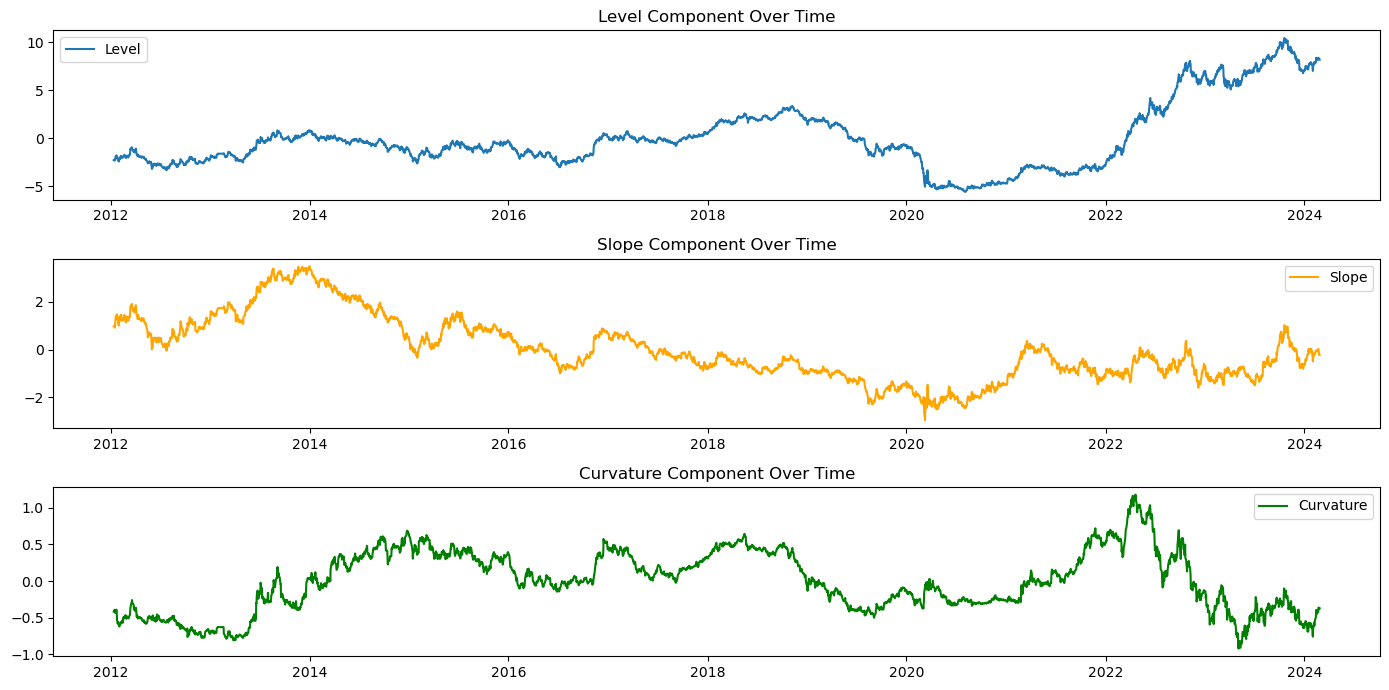

In [32]:
# Plot each principal component
plt.figure(figsize=(14, 7))

# Plot the 'Level' component
plt.subplot(3, 1, 1) 
plt.plot(pca_df.index, pca_df['Level'], label='Level')
plt.title('Level Component Over Time')
plt.legend()

# Plot the 'Slope' component
plt.subplot(3, 1, 2) 
plt.plot(pca_df.index, pca_df['Slope'], label='Slope', color='orange')
plt.title('Slope Component Over Time')
plt.legend()

# Plot the 'Curvature' component
plt.subplot(3, 1, 3)  
plt.plot(pca_df.index, pca_df['Curvature'], label='Curvature', color='green')
plt.title('Curvature Component Over Time')
plt.legend()

plt.tight_layout()
plt.show()


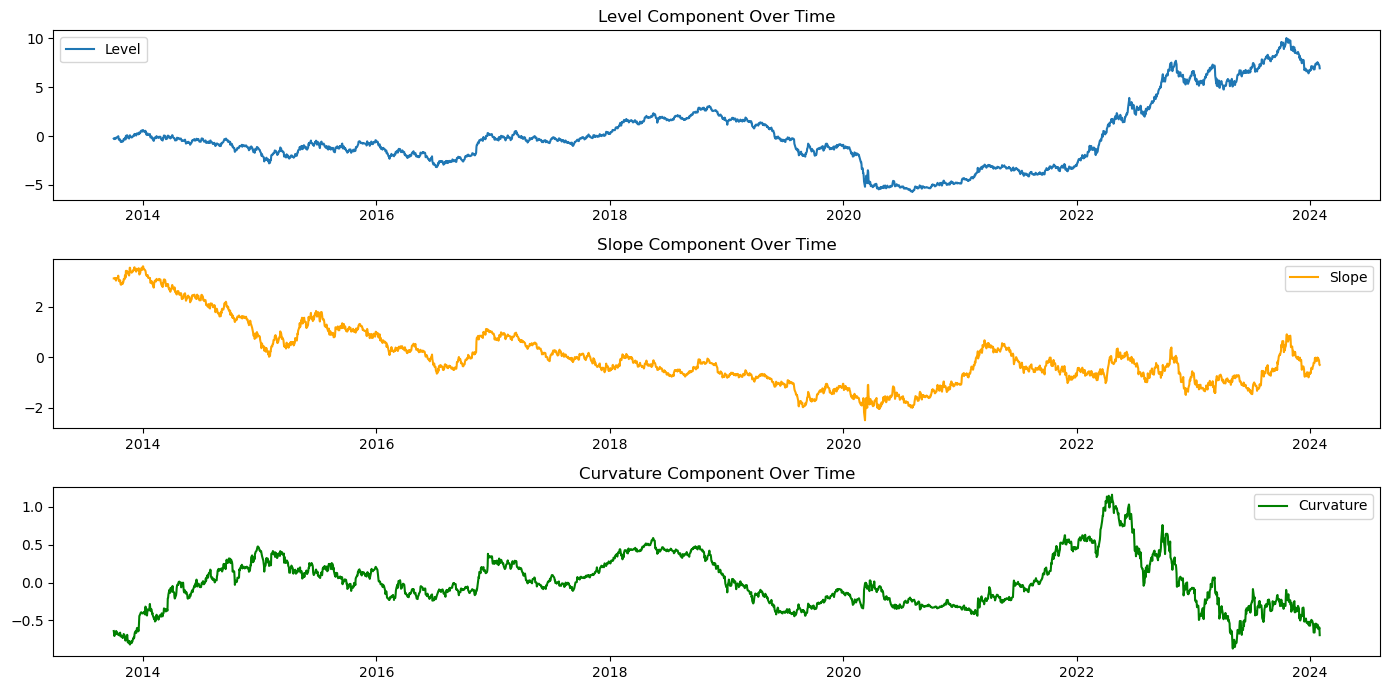

In [33]:
# Filter the DataFrame for the desired date range
start_date = '2013-10-01'
end_date = '2024-01-31'
filtered_df = df.loc[start_date:end_date]

# Perform scaling on the filtered DataFrame
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(filtered_df)

# Apply PCA on the scaled data
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results, using the filtered DataFrame's index
pca_df = pd.DataFrame(pca_components, index=filtered_df.index, columns=['Level', 'Slope', 'Curvature'])


plt.figure(figsize=(14, 7))

# Plot the 'Level' component
plt.subplot(3, 1, 1)
plt.plot(pca_df.index, pca_df['Level'], label='Level')
plt.title('Level Component Over Time')
plt.legend()

# Plot the 'Slope' component
plt.subplot(3, 1, 2)
plt.plot(pca_df.index, pca_df['Slope'], label='Slope', color='orange')
plt.title('Slope Component Over Time')
plt.legend()

# Plot the 'Curvature' component
plt.subplot(3, 1, 3)
plt.plot(pca_df.index, pca_df['Curvature'], label='Curvature', color='green')
plt.title('Curvature Component Over Time')
plt.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [35]:
# Resample the pca_df DataFrame to get the month-end values for each component
month_end_pca_df = pca_df.resample('M').last()

# Export the month-end PCA data to a CSV file
month_end_pca_df.to_csv('PCA_export.csv')
